<div class="alert alert-success">
**Requirements**

</div>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
plt.style.use('ggplot')
import datetime
from imf_currencies_codes import *

In [2]:
def exchange_rate(rate0,rate1):
    ''' Measures the rate of depreciation (if < 0) or appreciation (if > 0) '''
    rv = (rate0 - rate1) / rate1
    return rv

In [3]:
def replace_comma(string):
    ''' It replaces comma within a string '''
    string = str(string)
    rv_string = string.replace(',', '')
    return rv_string

In [4]:
''' Defines the date as a string '''
date = datetime.datetime.now().isoformat()[0:10]

<div class="alert alert-success">
**Matrix M1**

</div>

In [6]:
''' Calls the file into iPython '''
file = 'imf_currencies_{}.xls'.format(date)
today_currencies = pd.read_csv(file, sep = '\t', header = 0)

In [7]:
''' Adds code and country columns from imf_currencies_codes.py to today_currencies '''
codes = []
countries = []
currencies = []
for currency in today_currencies['Currency']:
    currencies.append(currency)
    country = imf_currencies_codes[currency][0]
    code = imf_currencies_codes[currency][1]
    codes.append(code)
    countries.append(country)
today_currencies['Codes'] = codes
today_currencies['Countries'] = countries

In [8]:
''' Extracts dates as column names '''
exceptions = ['Currency', 'Codes', 'Countries']
dates = [] >>>>>>>>>>>>>>>>>>>>>> CONVERTIR EN DICTIONARY CON ORDEN
for colname in today_currencies.columns:
    if colname not in exceptions:
        dates.append(colname)

SyntaxError: invalid syntax (<ipython-input-8-31373fcba681>, line 3)

In [9]:
''' Extracts dates as column names '''
exceptions = ['Currency', 'Codes', 'Countries']
dates = {}
index = 0
for colname in today_currencies.columns:
    if colname not in exceptions:
        dates[index] = colname
        index += 1

In [11]:
''' Transforms format <xx,xxx.xx> into <xxxxx.xx> in the original pandas data frame '''
for date in dates.values():
    today_currencies[date] = today_currencies[date].apply(replace_comma)

In [12]:
''' Extracts the performance of every currency for every relevant date '''
performance = {}
index = 0
for currency in today_currencies['Currency']:
    performance[currency] = {}
    for date in dates.values():
        rv = today_currencies[date][index]
        real_rv = float(rv)
        if np.isnan(real_rv):
            pass
        else:
            performance[currency][date] = real_rv
    index += 1

In [13]:
''' Creates super_performance and day_periods '''
super_performance = {}
day_periods = []
for x in range(len(today_currencies)):
    currency = today_currencies['Currency'][x]
    super_performance[currency] = {}
    for date_i, date in dates.items():
        if date_i == 0:
            pass
        else:
            date_0 = dates[date_i - 1]
            date_1 = dates[date_i]
            rate_t0 = float(today_currencies[date_0][x])
            rate_t1 = float(today_currencies[date_1][x])
            rate_change = (rate_t0 - rate_t1) / rate_t1
            day_period = date_0 + ' to ' + date_1
            day_periods.append(day_period)
            super_performance[currency][day_period] = rate_change
day_periods = set(day_periods)

<div class="alert alert-success">
**Objects**

</div>

From matrix M1 we have built:

currencies        -> List of currencies
dates             -> List of dates len(dates) = m
codes             -> List of currency codes 
countries         -> List of countries
performance       -> Dictionary of performance
day_periods       -> List of day periods len(day_periods) = m - 1
super_performance -> Dictionary of super performance

<div class="alert alert-success">
**Matrix M2**

</div>

In [57]:
''' Creates matrix M2 '''
M2 = pd.DataFrame({'Currencies': currencies})
for day_period in day_periods:
    rate_change_list = []
    for currency in currencies:
        rv = super_performance[currency][day_period]
        rate_change_list.append(rv)
    M2[day_period] = rate_change_list

<div class="alert alert-success">
**Matrix M3**

</div>

In [110]:
>>>>>>>>>>>>>>>>> CONVERTIR EN DICTIONARIES
X = [] # Mean rate change
Y = [] # Variance rate change
for currency in currencies:
    currency_super_performance = list(super_performance[currency].values())
    mean_change = np.nanmean(currency_super_performance)
    sigma_change = np.nanstd(currency_super_performance)
    X.append(mean_change)
    Y.append(sigma_change)

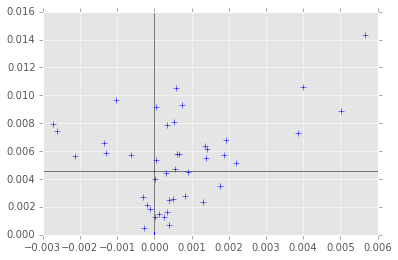

In [212]:
mean_y = np.nanmean(Y)
plt.axvline(0, color = 'black', linestyle = 'solid', linewidth = .5)
plt.axhline(mean_y, color = 'black', linestyle = 'solid', linewidth = .5)
plt.plot(X, Y, '+', c = 'blue')
Q1 = []
Q2 = [] >>>>>>>>>>>>> LLENAR CON LAS CURRENCIES DE ACUERDO AL CUADRANTE DONDE ESTÁN
Q3 = []
Q4 = []
for 

In [172]:
M2.to_csv("C:\\Users\\Andres\\Documents\\+ RESPALDO\\SCM\\M2_{}.csv".format(date), index=False)
M3 = pd.read_csv(file, sep = '\t', header = 0, >>>>>>>>>>>>>>> NOINDEX)